## Second week at Stepik intro to DS
### Random forest

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [3]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [7]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
X = data[['X_1', 'X_2']]

In [26]:
y = data.Y

In [27]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Plot decision tree in python

In [13]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [18]:
import sklearn.datasets as datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
y_iris = iris.target

In [60]:
data.rename(columns={'gavkaen':'gav'}, inplace=True)

In [61]:
data

,sherst,gav,lazaet,Y
0,1,1,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,0,1,0
5,1,0,1,0
6,1,0,1,0
7,1,0,1,0
8,1,1,1,0
9,0,0,1,0


In [95]:
X_train = data[["sherst","gav"]]

In [63]:
y_train = data.Y

In [96]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

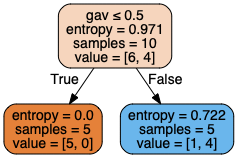

In [97]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,\
                special_characters=True, feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Entropy reduction and Information Gain

In [43]:
data = pd.DataFrame()
data["sherst"] = [1,1,1,1,1,1,1,1,1,0]
data["gavkaen"] = [1,1,1,1,0,0,0,0,1,0]
data["lazaet"] = [0,0,0,0,1,1,1,1,1,1]
data["Y"] = [1,1,1,1, 0,0,0,0,0,0]

In [35]:
Entrope_sherst_cat = - (1/4*np.log2(1/4))-(3/4*np.log2(3/4))

In [41]:
Entrope_sherst_cat = - (4/9*np.log2(4/9))-(5/9*np.log2(5/9))
Entrope_sherst_dog = - (1/1*np.log2(1/1))-(0/1*np.log2(0/1))

/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [44]:
Entrope_gav_cat = - (0/5*np.log2(0/5))-(5/5*np.log2(5/5))
Entrope_gav_dog = - (4/5*np.log2(4/5))-(1/5*np.log2(1/5))

/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [46]:
Entrope_gav_dog

0.7219280948873623

In [47]:
Entrope_lazaet_cat = - (0/6*np.log2(0/6))-(6/6*np.log2(6/6))
Entrope_lazaet_dog = - (4/4*np.log2(4/4))-(0/4*np.log2(0/4))

/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  
/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [50]:
print("sherst_dog:", Entrope_sherst_dog, "\n"\
    "sherst_cat:", Entrope_sherst_cat, "\n",
     "gav_dog:", Entrope_gav_dog, "\n"\
    "gav_cat:", Entrope_gav_cat, "\n",
     "lazaet_dog:", Entrope_lazaet_dog, "\n"\
    "lazaet_cat:", Entrope_lazaet_cat, "\n")

sherst_dog: nan 
sherst_cat: 0.9910760598382222 
 gav_dog: 0.7219280948873623 
gav_cat: nan 
 lazaet_dog: nan 
lazaet_cat: nan 



### Information Gain

In [100]:
Entropy = - (4/10*np.log2(4/10))- (6/10*np.log2(6/10))

In [101]:
Entropy

0.9709505944546686

In [102]:
data

,sherst,gav,lazaet,Y
0,1,1,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,0,1,0
5,1,0,1,0
6,1,0,1,0
7,1,0,1,0
8,1,1,1,0
9,0,0,1,0


In [113]:
IG_shesrst = Entropy - (9/10)*0.99 - (1/10)*0
IG_gav = Entropy - (5/10)*0 - (5/10)*0.72
IG_lazaet = Entropy - (6/10)*0 - (6/10)*0

In [114]:
IG_shesrst

0.07995059445466857

### Titanic data

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn import tree

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [65]:
from IPython.display import HTML
style = '<style>svg{width:40% !important; height:10% !important;}</style>'

In [14]:
# get titanic files as a DataFrame
titanic_dataframe = pd.read_csv("https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar1/titanic/train.csv")#, index_col='PassengerId')

In [55]:
X = titanic_dataframe.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"],axis=1)

In [56]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [57]:
Y = titanic_dataframe.Survived

### How to convert from `str` data to `int` data in dataset with `pandas`

In [58]:
X = pd.get_dummies(X_train)

We need to remove `nan` 

In [59]:
X.Age.median()

28.0

In [60]:
X.fillna({'Age':X_train.Age.median()}, inplace=True)

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [61]:
X.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [62]:
clf.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

One more way to plot decision tree 

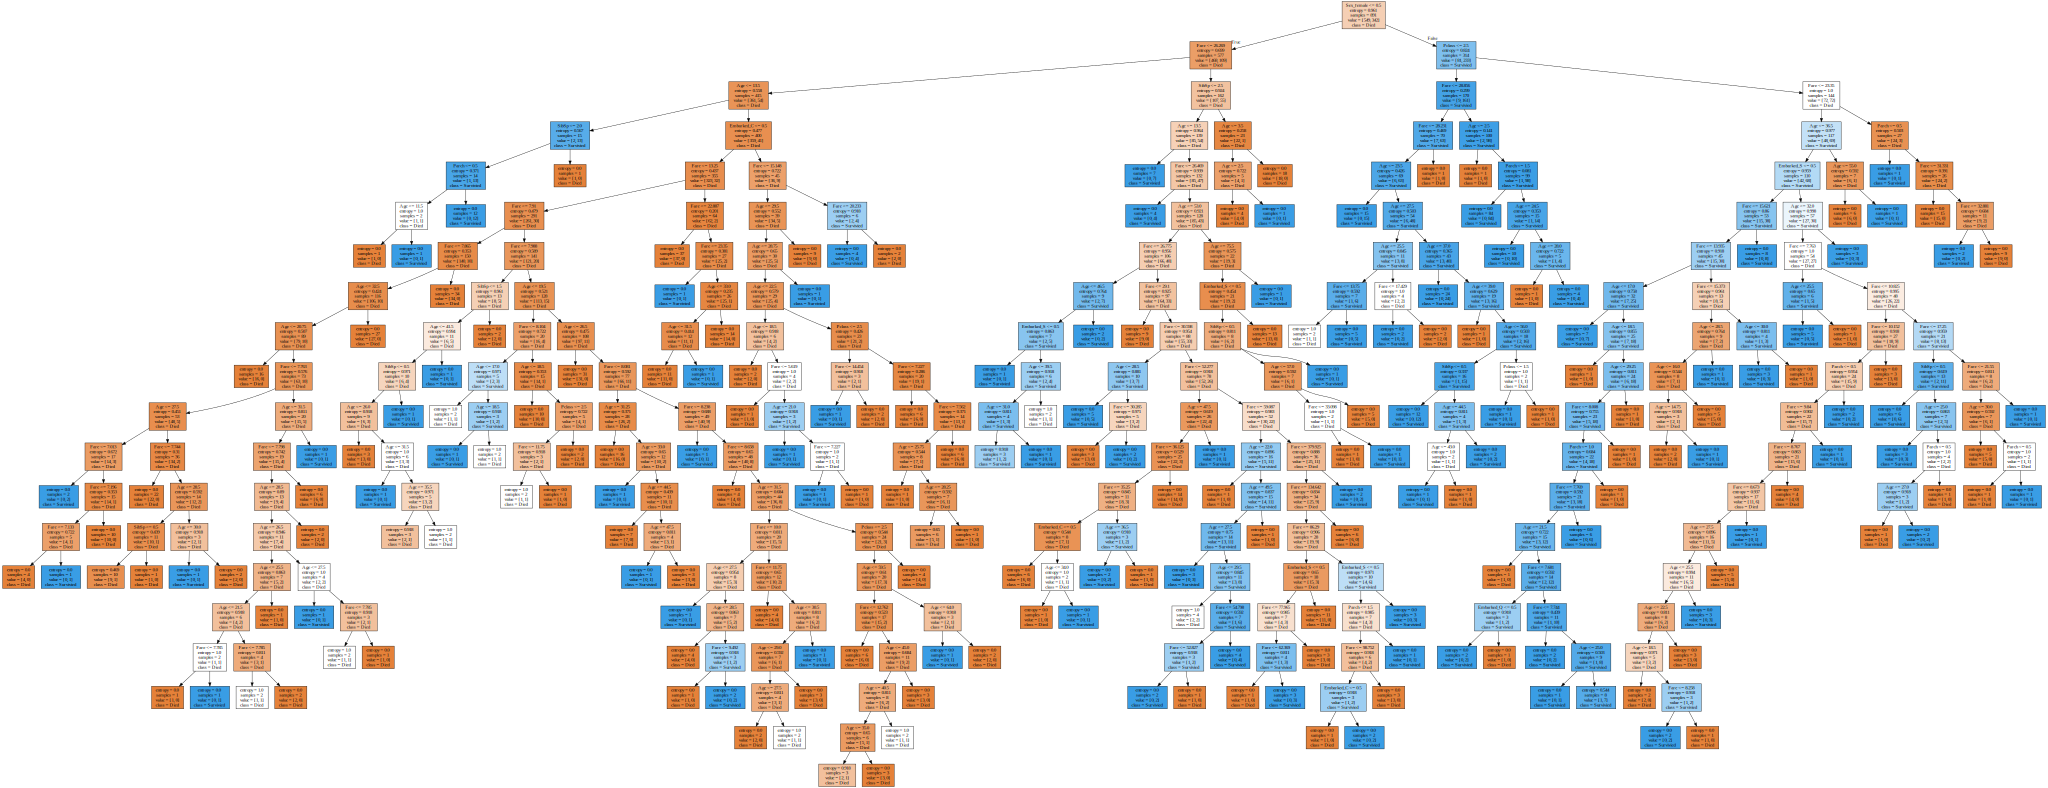

In [66]:
graph = Source(tree.export_graphviz(clf, out_file=None,\
                feature_names = list(X), class_names = ["Died", "Survivied"], filled=True))
display(SVG(graph.pipe(format='svg')))

### `Test` and `Train` split

In [46]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [70]:
clf.score(X, Y)

0.9797979797979798

In [81]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
clf.score(X_train, y_train)

0.8238255033557047

In [83]:
clf.score(X_test, y_test)

0.8203389830508474

In [80]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Depth of decision tree 

In [111]:
max_depth_values = range(1,100)

In [112]:
scores_data = pd.DataFrame()

In [119]:
for max_depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    # Делаем кросс-валидацию
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    # Делаем временный дата-фрейм что бы туда закидывать данные 
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
#   Добавляем все в оснвной датафрейм
    scores_data = scores_data.append(temp_score_data)

In [120]:
temp_score_data

,max_depth,train_score,test_score,cross_val_score
0,99,0.979866,0.766102,0.761779


In [123]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.797031
...,...,...,...,...
0,95,0.979866,0.776271,0.768501
0,96,0.979866,0.766102,0.768501
0,97,0.979866,0.766102,0.760098
0,98,0.979866,0.776271,0.773529


In [ ]:
score_data_long =

In [124]:
score_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                    value_vars=['train_score', 'test_score', 'cross_val_score'],
                    var_name='set_type', value_name='score')

In [126]:
score_data_long.tail()

,max_depth,set_type,score
292,95,cross_val_score,0.768501
293,96,cross_val_score,0.768501
294,97,cross_val_score,0.760098
295,98,cross_val_score,0.773529
296,99,cross_val_score,0.761779


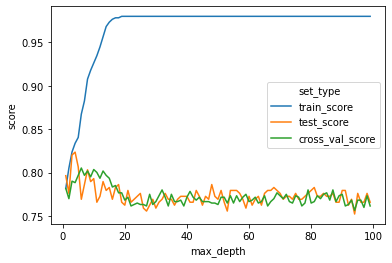

In [127]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_data_long)

### Cross-validation

In [117]:
from sklearn.model_selection import cross_val_score

In [103]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [131]:
score_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.805434
204,7,cross_val_score,0.797017
205,8,cross_val_score,0.802045
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.803711


In [133]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [134]:
best_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [136]:
best_clf.score(X_test, y_test)

0.7559322033898305

In [159]:
cross_val_score(clf, X_train, y_train, cv=10).mean()

0.7669491525423728

### Task 2.4

In [205]:
data_iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)

In [206]:
data_iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)

In [209]:
np.random.seed(0)

In [213]:
data_iris_train.shape

(100, 5)

In [216]:
data_iris_test.shape

(50, 5)

In [173]:
#data_iris.drop(labels="Unnamed: 0", axis=1, inplace=True)

In [217]:
X_train = data_iris_train[['sepal length', 'sepal width', 'petal length', 'petal width']]

In [218]:
y_train = data_iris.species

In [197]:
#У нас есть 2 датасета, авторы уже разбили iris на test and train
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [219]:
X_test = data_iris_test[['sepal length', 'sepal width', 'petal length', 'petal width']]

In [220]:
y_test = data_iris_test.species

In [221]:
map_depth_values = range(1,100)
scores_result = pd.DataFrame()

In [222]:
for max_depth in map_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_df = pd.DataFrame({'max_depth':[max_depth],
                            'train_score':[train_score],
                            'test_score':[test_score]})
    scores_result = scores_result.append(temp_df)

In [223]:
iris_data_long = pd.melt(scores_result, id_vars=['max_depth'], 
                    value_vars=['train_score', 'test_score'],
                    var_name='set_type', value_name='score')

In [224]:
iris_data_long

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
...,...,...,...
193,95,test_score,0.92
194,96,test_score,0.92
195,97,test_score,0.92
196,98,test_score,0.94


In [228]:
sns.set(rc={'figure.figsize':(9,6)})

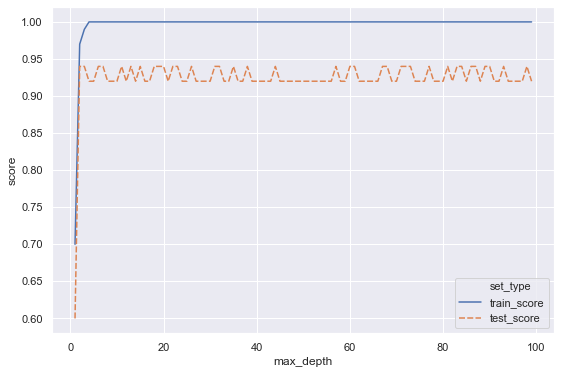

In [229]:
sns.lineplot(x='max_depth', y='score', hue='set_type', style='set_type', data=iris_data_long)

### Task 2.4.1

In [232]:
cat_dogs_data_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [277]:
cat_dogs_test = pd.read_json('dataset_209691_15.txt')

In [278]:
cat_dogs_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,25,30.0,1,1,0
1,20,24.0,1,0,0
2,33,39.6,1,1,0
3,22,26.4,1,1,0
4,19,22.8,1,0,0
...,...,...,...,...,...
95,9,3.6,1,0,1
96,5,2.0,1,0,1
97,6,2.4,1,0,1
98,8,3.2,1,0,1


In [239]:
cat_dogs_data_train.columns

Index(['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям', 'Вид'], dtype='object')

/Users/mikhailgasanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


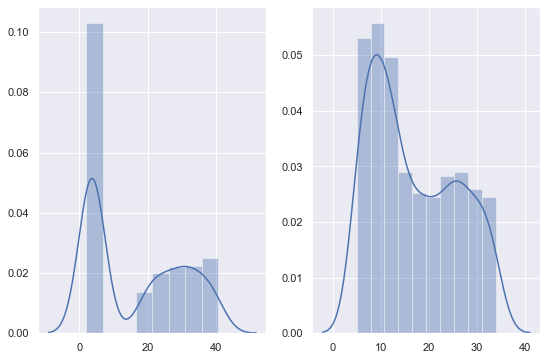

In [255]:
fig, ax =plt.subplots(1,2)
sns.distplot(cat_dogs_data_train[['Высота']], ax=ax[0])
sns.distplot(cat_dogs_data_train[['Длина']], ax=ax[1])
fig.show()

In [256]:
X_train = cat_dogs_data_train[['Шерстист', 'Гавкает', 'Лазает по деревьям']]

In [257]:
y_train = cat_dogs_data_train[['Вид']]

In [259]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [260]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [282]:
X_test = cat_dogs_test[['Шерстист', 'Гавкает', 'Лазает по деревьям']]


In [283]:
y_test = clf.predict(X_test)

In [284]:
list_of_test = list(y_test)

In [285]:
list_of_test.count('собачка')

58